<div>
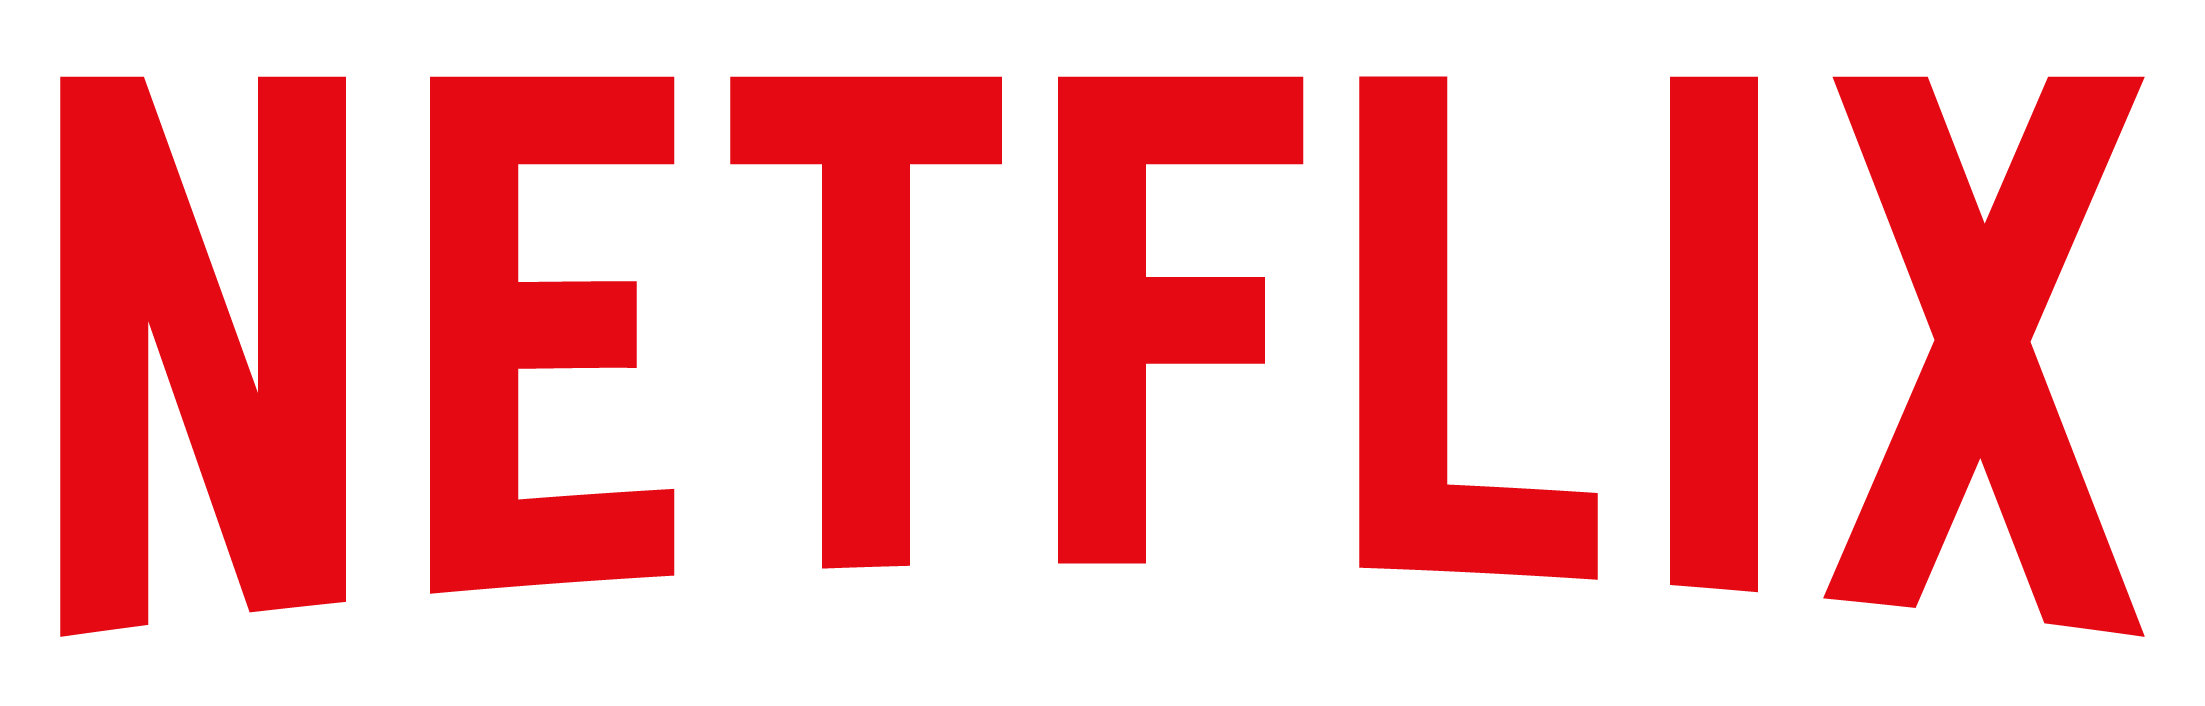
</div>

## Business Problem

**Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries**

## About Netflix

*Netflix is a subscription-based streaming service that allows users to watch TV shows, movies, documentaries, and more on a variety of devices. The company was founded in 1997 as a DVD-by-mail service, but it has since shifted its focus to streaming video content over the internet. Netflix has disrupted the entertainment industry by creating a new distribution model for content that has changed the way people consume movies and TV shows. It is available in over 190 countries, and it has over 200 million subscribers worldwide.*

In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__The tabular dataset consists of listings of all the movies and tv shows available on Netflix,along with details such as - cast, directors, ratings, release year, duration, etc__

In [2]:
# loading the dataset

data = pd.read_csv("netflix.csv")

### Preliminary inspection of the data

In [3]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.shape

(8807, 12)

__*Observation*__ :  __8807 entries (rows)__ and __12 categories (columns)__

In [5]:
# The 12 columns

print(list(data.columns))

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [6]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


***Note*** : As of now, only ***'release_year'*** has ***integer*** datatype

In [7]:
# Checking for null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


__*Observation*__ :  The columns, **'director', 'cast', 'country', 'date_added', 'rating', 'duration'** have null values

In [8]:
# Number of null values in each column

data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# Percentage of null values in each column

((data.isna().sum()/len(data))*100).round(2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

***Observation***
- 29.9% of the data in ***director*** column are null
- 9.44% of the data in ***country*** column are null
- 9.37% of the data in ***cast*** column are null
- 0.11% of the data in ***date_added*** column are null
- 0.05% of the data in ***rating*** column are null
- 0.03% of the data in ***duration*** column are null

### Data Cleaning

#### 1. Column : director

In [10]:
data["director"].isna().sum()

2634

***29.9% (2634)*** of the data in ***director column*** are null

**Replacing the null values**

***Approach*** : Considering the context, we can replace the null values in the **director** column with **'Others'**

In [11]:
data['director'].replace(np.nan, "Others", inplace=True)

In [12]:
data['director'].isna().sum()

0

#### 2. Column : cast

In [13]:
data["cast"].isna().sum()

825

***9.37% (825)*** of the data in ***cast column*** are null

**Replacing the null values**

***Approach*** : Since the context is similar to previous case, we can replace the null values in the **cast** column with **'Others'**

In [14]:
data['cast'].replace(np.nan, "Others", inplace=True)

In [15]:
data['cast'].isna().sum()

0

#### 3. Column : country

In [16]:
data['country'].isna().sum()

831

***9.44% (831)*** of the data in ***country*** column are null

**Replacing the null values**

***Approach*** : The null values in the ***country*** column can be replaced with the **mode** of the column

In [17]:
data["country"].value_counts().head(5)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64

In [18]:
data['country'].mode()[0]

'United States'

*Mode of the **country** column* : **United States**

In [19]:
data["country"] = data["country"].fillna(data["country"].mode()[0])

In [20]:
data['country'].isna().sum()

0

#### 4. Column : date_added

**In this column there are two issues**
1. Datatype of the column has to be changed from **string (object) to datetime** 
2. Replacing the null values

In [21]:
data['date_added'].dtypes

dtype('O')

In [22]:
# Changing the datatype

data['date_added'] = pd.to_datetime(data['date_added'])

In [23]:
data['date_added'].dtypes

dtype('<M8[ns]')

**Replacing the null values**

In [24]:
data['date_added'].isna().sum()

10

***0.11% (10)*** of the data in ***date_added*** column are null

***Approach*** : The null values in the ***country*** column can be replaced with the **mode** of the column

In [25]:
data['date_added'].mode()[0]

Timestamp('2020-01-01 00:00:00')

In [26]:
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])

In [27]:
data['date_added'].isna().sum()

0

In [28]:
# Seperate columns for year of release and month of release

data['month'] = data['date_added'].dt.month_name()
data['added_year'] = data['date_added'].dt.year
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021


#### 5. Column : rating

In [29]:
data["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [30]:
data["rating"].isnull().sum()

4

**Replacing the null values**

***0.05% (4)*** of the data in ***rating*** column are null

***Approach*** : The null values in the ***country*** column can be replaced with the **mode** of the column

In [31]:
data[data["type"]=="Movie"]["rating"].mode()

0    TV-MA
Name: rating, dtype: object

In [32]:
data[data["type"]=="TV Show"]["rating"].mode()

0    TV-MA
Name: rating, dtype: object

Since the **mode of the rating is same for both Movie and TV Show**, we can replace the null values with **TV-MA**

In [33]:
data["rating"]=data["rating"].fillna(data["rating"].mode()[0])

In [34]:
data["rating"].isnull().sum()

0

#### 6. Column : duration

In [35]:
data["duration"].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

***Obeservation***
- Column **duration** has mixed values as it accounts for the duration of TV shows in "seasons" and Movies in "mins".
- To replace the null values, first the rows containing TV shows and movies have to identified individually

In [36]:
data[data['type'] == 'Movie' ]["duration"].isnull().sum()

3

In [37]:
data[data['type'] == 'TV Show' ]["duration"].isnull().sum()

0

***Observation*** :
*It is observed that only the Movies have null values and TV shows do not, Hence it would be meaningful to replace the null values of column duration with the mode of movie duration**

In [38]:
data[data['type'] == 'Movie' ]["duration"].mode()[0]

'90 min'

In [39]:
data["duration"]=data["duration"].fillna(data[data['type'] == 'Movie' ]["duration"].mode()[0])

In [40]:
data["duration"].isnull().sum()

0

In [41]:
# Since the duration column has the runtime of TV shows in 'seasons' and that of Movies in 'min'

data['runtime'] = data['duration'].apply (lambda x: str(x).split(' ')[1])

In [42]:
data['duration'] = data['duration'].apply(lambda x: str(x).split(' ')[0])

In [43]:
# Converting the datatype of duration from string (object) to integer (int64)

data['duration'] = data['duration'].astype(int)

In [44]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,added_year,runtime
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,2021,min
1,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021,Seasons


In [45]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month           0
added_year      0
runtime         0
dtype: int64

***Observation*** : *All null values are taken care of*

**NOTE** : *The column description is not significant for this type of analysis, Hence it can be dropped*

In [46]:
data.drop(columns=["description"],inplace=True)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month,added_year,runtime
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2021-09-25,2020,PG-13,90,Documentaries,September,2021,min
1,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Season
3,s4,TV Show,Jailbirds New Orleans,Others,Others,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV",September,2021,Season
4,s5,TV Show,Kota Factory,Others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",September,2021,Seasons


**NOTE** : *The column 'listed_in can be renamed to 'genre'*

In [47]:
data.rename(columns={'listed_in':'genre'},inplace=True)
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,month,added_year,runtime
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2021-09-25,2020,PG-13,90,Documentaries,September,2021,min
1,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Seasons


### Unnesting the data

In [48]:
def unnest(df,column):
    column_list = (df[column].apply(lambda x:str(x).split(", "))).tolist()
    column_df = pd.DataFrame(column_list,index=df["title"])
    column_stacked = column_df.stack()
    column_stacked = column_stacked.reset_index()
    column_stacked.drop(columns=['level_1'],inplace=True,axis =1)
    return column_stacked

# In some columns the data is separarted by commas and filled in a single cell,
# since this can be misleading while generating insights, we can call the above function to unnest the data

## Data Visualisation

### 1. Popularity - Column :  type

In [49]:
df_copy = data.copy()

In [50]:
df_copy["type"].value_counts() 

Movie      6131
TV Show    2676
Name: type, dtype: int64

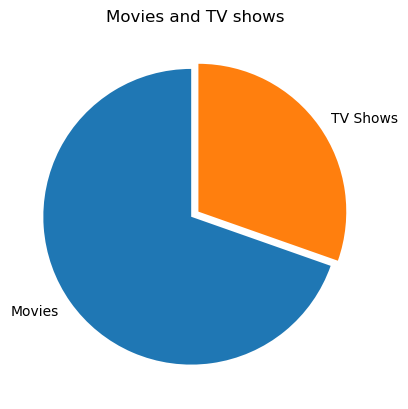

In [51]:
plt.pie(df_copy["type"].value_counts(),startangle = 90,explode=(0.03,0.03),labels=["Movies","TV Shows"])
plt.title("Movies and TV shows")
plt.show()

In [52]:
(df_copy["type"].value_counts()/len(df_copy)*100).round(2)

Movie      69.62
TV Show    30.38
Name: type, dtype: float64

***Observation*** : **69.62%** of the entries are movies and **30.38%** are TV shows
#### INSIGHT : Movies are more popular than TV shows

### 2. Popularity - Column :  rating

#### Quick description of movie rating in United States 
###### - TV shows
 - TV-MA : Mature audience only
 - TV-14 : Parents strongly cautioned
 - TV-PG : Parental guidance suggested
 - TV-Y7 : Directed to Older Children
 - TV-Y  : All Children
 - TV-G  : General Audience
 - TV-Y7-FV : Fantasy violence
 
###### - Movies
 - R     : Restricted – Under 17
 - PG-13 : Parents Strongly Cautioned
 - PG    : Parental Guidance Suggested
 - NR    : Not Rated
 - G     : General Audiences
 - NC-17 : Adutls only
 - UR    : Unrated

In [53]:
# top 5 ratings

rating = df_copy["rating"].value_counts().reset_index()[:6]
rating

,index,rating
0,TV-MA,3211
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334


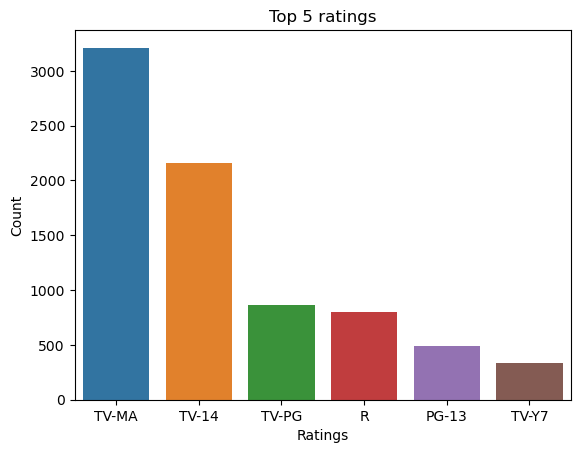

In [54]:
sns.barplot(data=rating,x=rating["index"],y=rating["rating"])
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Top 5 ratings')
plt.show()

***Observation*** : **TV-MA** is most popular, followed by **TV-14** and **TV-PG**
#### INSIGHT : Mature audience TV shows (TV-MA) are more popular followed by shows for kids of age 14 and above

### 3. Popularity - Column :  country

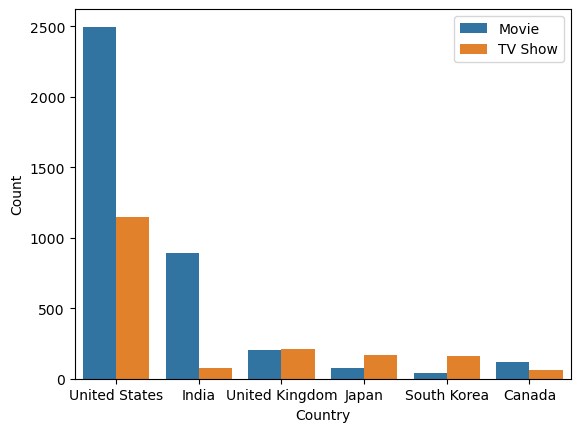

In [55]:
sns.countplot(data= df_copy, x= 'country', hue= 'type',order = df_copy["country"].value_counts().index[:6])
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(loc="upper right")
plt.show()

#### INSIGHTS :
**1. It is observed that United states leads the world in both TV shows and Movies, India stands second in the list, followed by United kingdom and Japan.**

**2. In India, it is observed that movies are more popular compared to TV shows**

**3. In South Korea and Japan, TV shows are more popular compared to movies**

### 4. Popularity - Column :  director

In [56]:
df_director = data.copy()

In [57]:
df_director.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,month,added_year,runtime
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2021-09-25,2020,PG-13,90,Documentaries,September,2021,min
1,s2,TV Show,Blood & Water,Others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",September,2021,Season
3,s4,TV Show,Jailbirds New Orleans,Others,Others,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV",September,2021,Season
4,s5,TV Show,Kota Factory,Others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",September,2021,Seasons


In [58]:
director_stacked = unnest(df_director,'director')

In [59]:
director_stacked

,title,0
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Others
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Others
4,Kota Factory,Others
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,Others
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [60]:
df_director=df_director.merge(director_stacked, on = 'title', how='inner')

In [61]:
df_director.drop(columns=['director'],axis=1,inplace=True)

In [62]:
df_director.rename(columns={0:'director'},inplace = True)

In [63]:
df_director.head(2)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,genre,month,added_year,runtime,director
0,s1,Movie,Dick Johnson Is Dead,Others,United States,2021-09-25,2020,PG-13,90,Documentaries,September,2021,min,Kirsten Johnson
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Seasons,Others


In [64]:
df_director['director'].value_counts()

Others            2634
Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Suhas Kadav         16
                  ... 
Raymie Muzquiz       1
Stu Livingston       1
Joe Menendez         1
Eric Bross           1
Mozez Singh          1
Name: director, Length: 4994, dtype: int64

**Observation** : *Excluding "others", The directors producing the most popular shows or movies are Rajiv Chilaka, Jan Suter and Raul Campos*

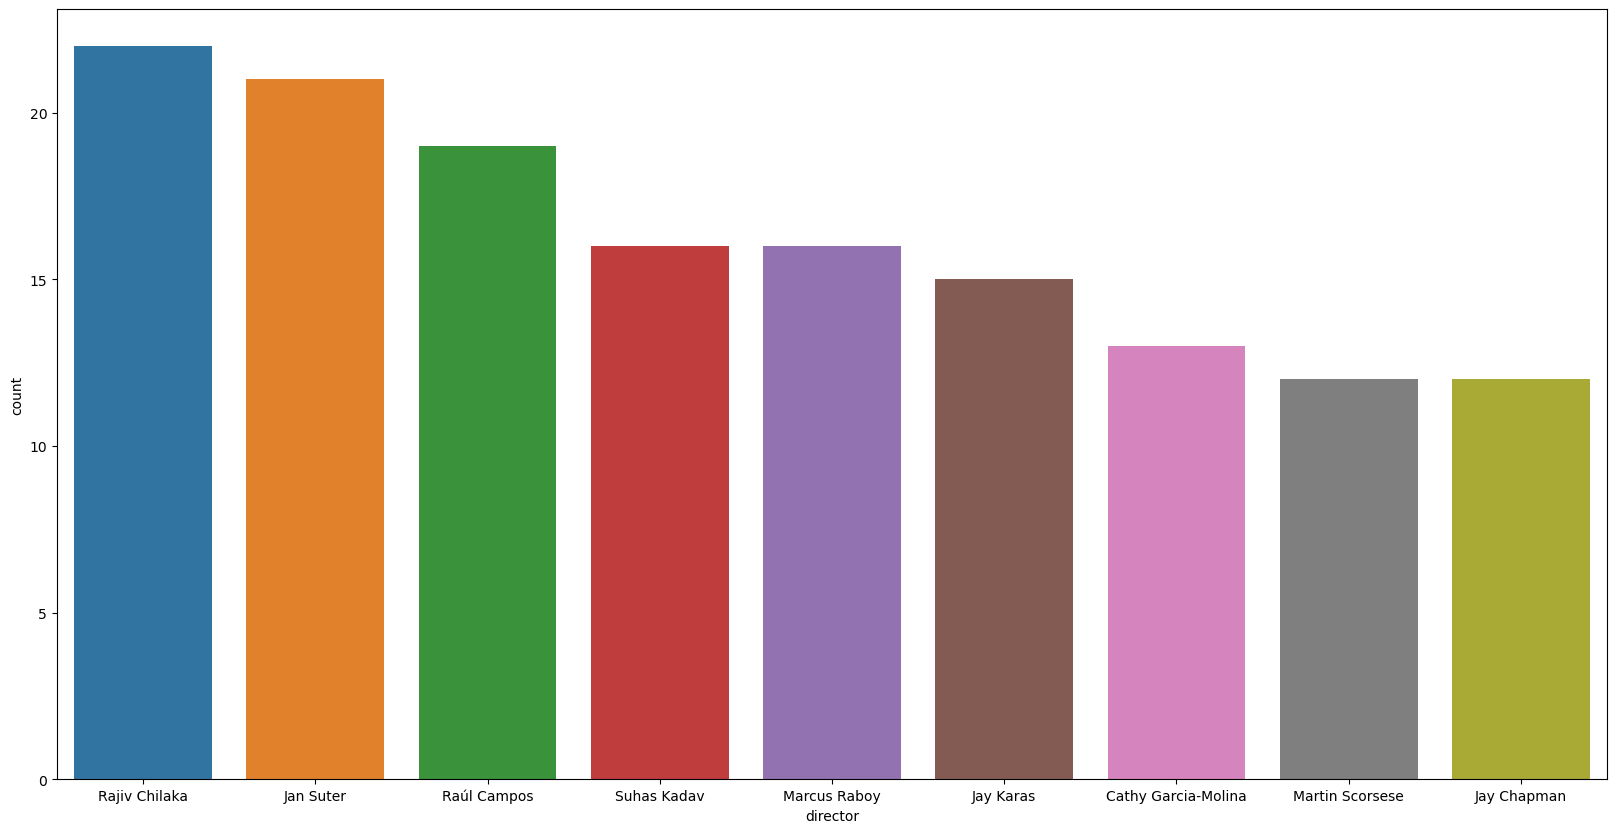

In [65]:
plt.figure(figsize=(20,10))
sns.countplot(data= df_director, x= 'director',order = df_director['director'].value_counts().index[1:10])
plt.show()

In [66]:
df_director[df_director['director']=="Rajiv Chilaka"]['title']

441                          Chhota Bheem - Neeli Pahaadi
442                                 Chhota Bheem & Ganesh
443                    Chhota Bheem & Krishna: Mayanagari
444     Chhota Bheem & Krishna: Pataliputra- City of t...
445                    Chhota Bheem And The Broken Amulet
446                Chhota Bheem And The Crown of Valhalla
447                  Chhota Bheem and the Incan Adventure
448                   Chhota Bheem and The ShiNobi Secret
449                              Chhota Bheem Aur Hanuman
450                              Chhota Bheem aur Krishna
451                   Chhota Bheem aur Krishna vs Zimbara
455                         Chhota Bheem: Bheem vs Aliens
456                  Chhota Bheem: Dholakpur to Kathmandu
457                              Chhota Bheem: Dus Pe Dus
459                        Chhota Bheem: Journey to Petra
460                       Chhota Bheem: Master of Shaolin
461                     Chhota Bheem: The Rise of Kirmada
2932          

**Observation** : *Rajiv Chilaka's **Chhota bheem** series and movies are popular in among kids in India*

In [67]:
df_director[(df_director['director']=="Jan Suter") | (df_director['director']=="Raúl Campos")]['country'].value_counts()

Mexico       22
Argentina    10
Chile         4
Colombia      4
Name: country, dtype: int64

In [68]:
directors_23 = df_director[(df_director['director']=='Jan Suter') | (df_director['director']=='Raúl Campos')]

In [69]:
directors_23.head(2)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,genre,month,added_year,runtime,director
5107,s4750,Movie,Coco y Raulito: Carrusel de ternura,"Coco Celis, Raúl Meneses",Mexico,2018-07-27,2018,TV-MA,57,Stand-Up Comedy,July,2018,min,Raúl Campos
5108,s4750,Movie,Coco y Raulito: Carrusel de ternura,"Coco Celis, Raúl Meneses",Mexico,2018-07-27,2018,TV-MA,57,Stand-Up Comedy,July,2018,min,Jan Suter


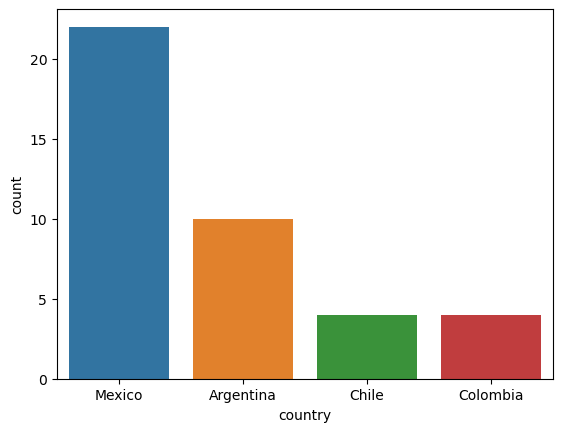

In [70]:
sns.countplot(data= directors_23, x = 'country')
plt.show()

**Observation** : ***Jan Suter and Raúl Campos*** *make popular South American films*

### 5. Popularity - Column :  cast

In [71]:
df_cast = data.copy()

In [72]:
df_cast['cast'].fillna("others", inplace = True)

In [73]:
cast_stacked = unnest(df_cast,'cast')

In [74]:
cast_stacked

,title,0
0,Dick Johnson Is Dead,Others
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [75]:
df_cast=df_cast.merge(cast_stacked,how="inner",on="title")

In [76]:
df_cast.drop(columns=['cast'],inplace=True,axis=1)

In [77]:
df_cast.rename(columns={0:"cast"},inplace=True)

In [78]:
df_cast.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,genre,month,added_year,runtime,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90,Documentaries,September,2021,min,Others
1,s2,TV Show,Blood & Water,Others,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",September,2021,Seasons,Ama Qamata


In [79]:
df_cast['cast'].value_counts()

Others                     825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: cast, Length: 36440, dtype: int64

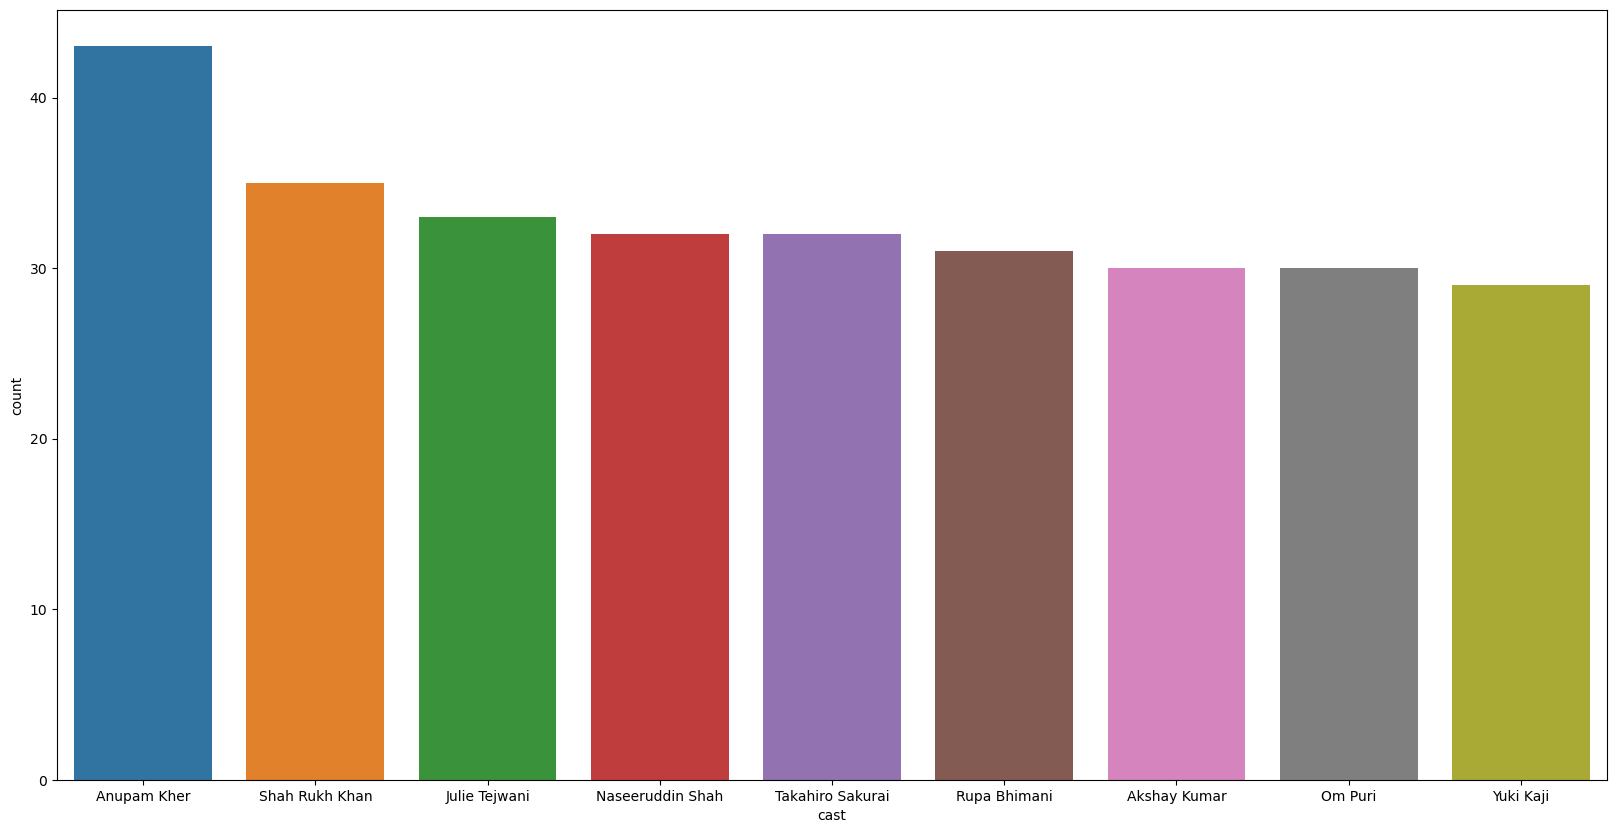

In [80]:
plt.figure(figsize=(20,10))
sns.countplot(data= df_cast, x= 'cast',order = df_cast['cast'].value_counts().index[1:10])
plt.show()

**Observation** : ***Anupham Kher*** has acted in many popular films and TV shows, followed by ***Sharukh Khan, Julie Tejwani and Naseeruddin Shah***

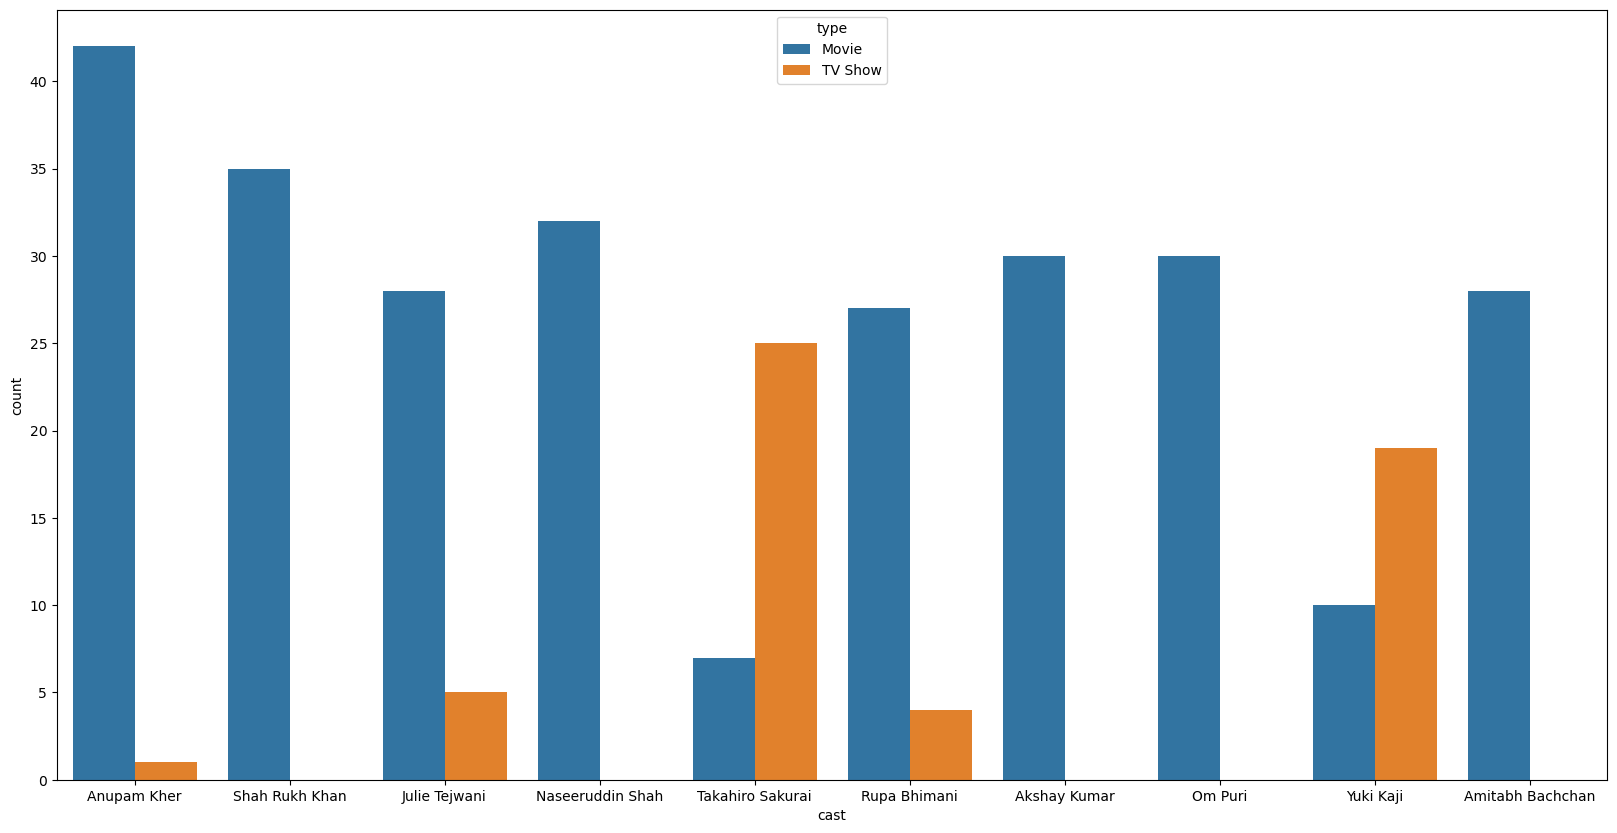

In [81]:
plt.figure(figsize=(20,10))
sns.countplot(data= df_cast, x= 'cast',order = df_cast['cast'].value_counts().index[1:11], hue = 'type')
plt.show()

**Observation** : It is observed that almost all the top 10 actors except ***Takahiro Sakurai and Yuki Kaji*** have been **casted many times** in **movies** that are popular.

In [82]:
movies = df_cast[df_cast['type']=="Movie"]
series = df_cast[df_cast['type']=="TV Show"]

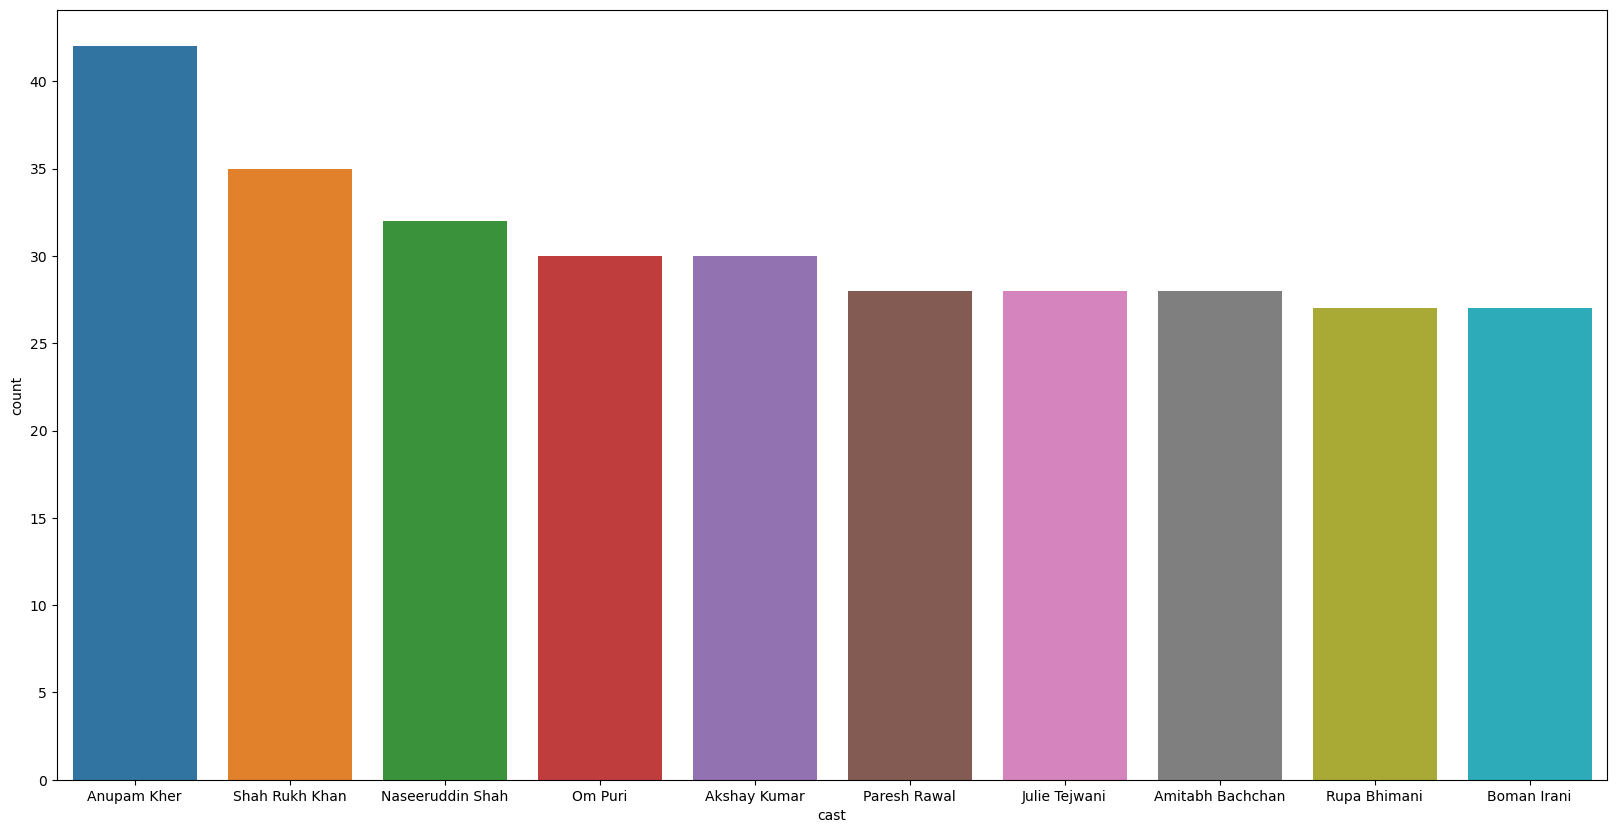

In [83]:
plt.figure(figsize=(20,10))
sns.countplot(data= movies, x= 'cast',order = movies['cast'].value_counts().index[1:11])
plt.show()

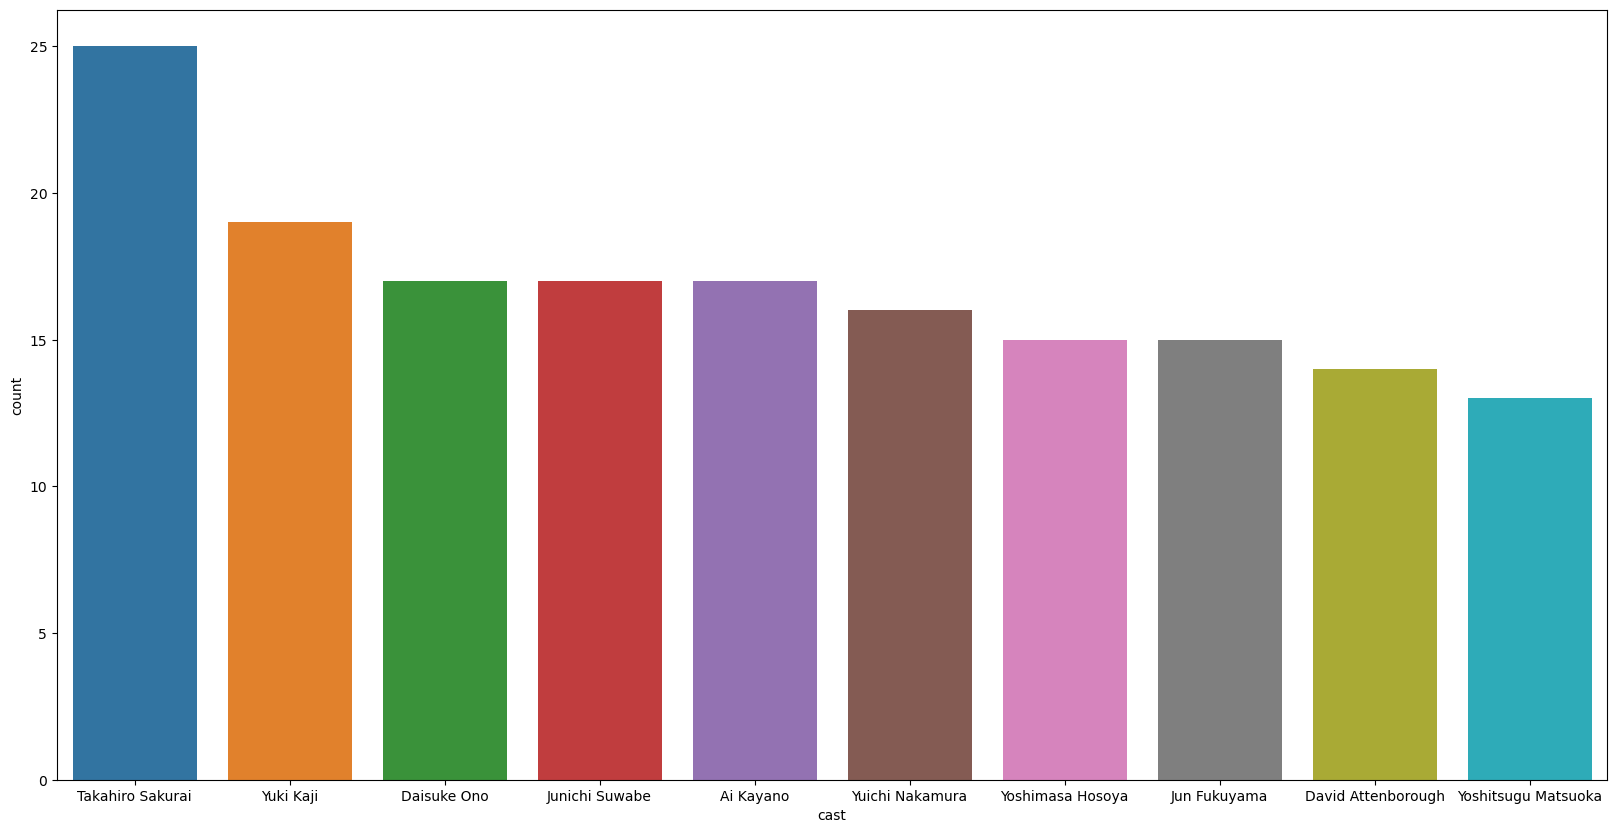

In [84]:
plt.figure(figsize=(20,10))
sns.countplot(data= series, x= 'cast',order = series['cast'].value_counts().index[1:11])
plt.show()

**Observation** : It is observed that ***Takahiro Sakurai, Yuki Kaji, Daisuke Ono*** have been casted many times in popular TV shows.

In [85]:
data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,month,added_year,runtime
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Others,United States,2021-09-25,2020,PG-13,90,Documentaries,September,2021,min


### 6. Popularity - Column :  release_year

In [86]:
release_year_m = movies["release_year"].value_counts().reset_index()[:10]
release_year_m

,index,release_year
0,2018,5107
1,2017,4789
2,2016,4301
3,2019,4101
4,2020,3681
5,2015,2778
6,2014,1958
7,2021,1876
8,2013,1782
9,2012,1416


In [87]:
release_year_s = series["release_year"].value_counts().reset_index()[:10]
release_year_s

,index,release_year
0,2019,3386
1,2020,3333
2,2018,2601
3,2021,2350
4,2017,1956
5,2016,1609
6,2015,1215
7,2014,571
8,2013,477
9,2012,449


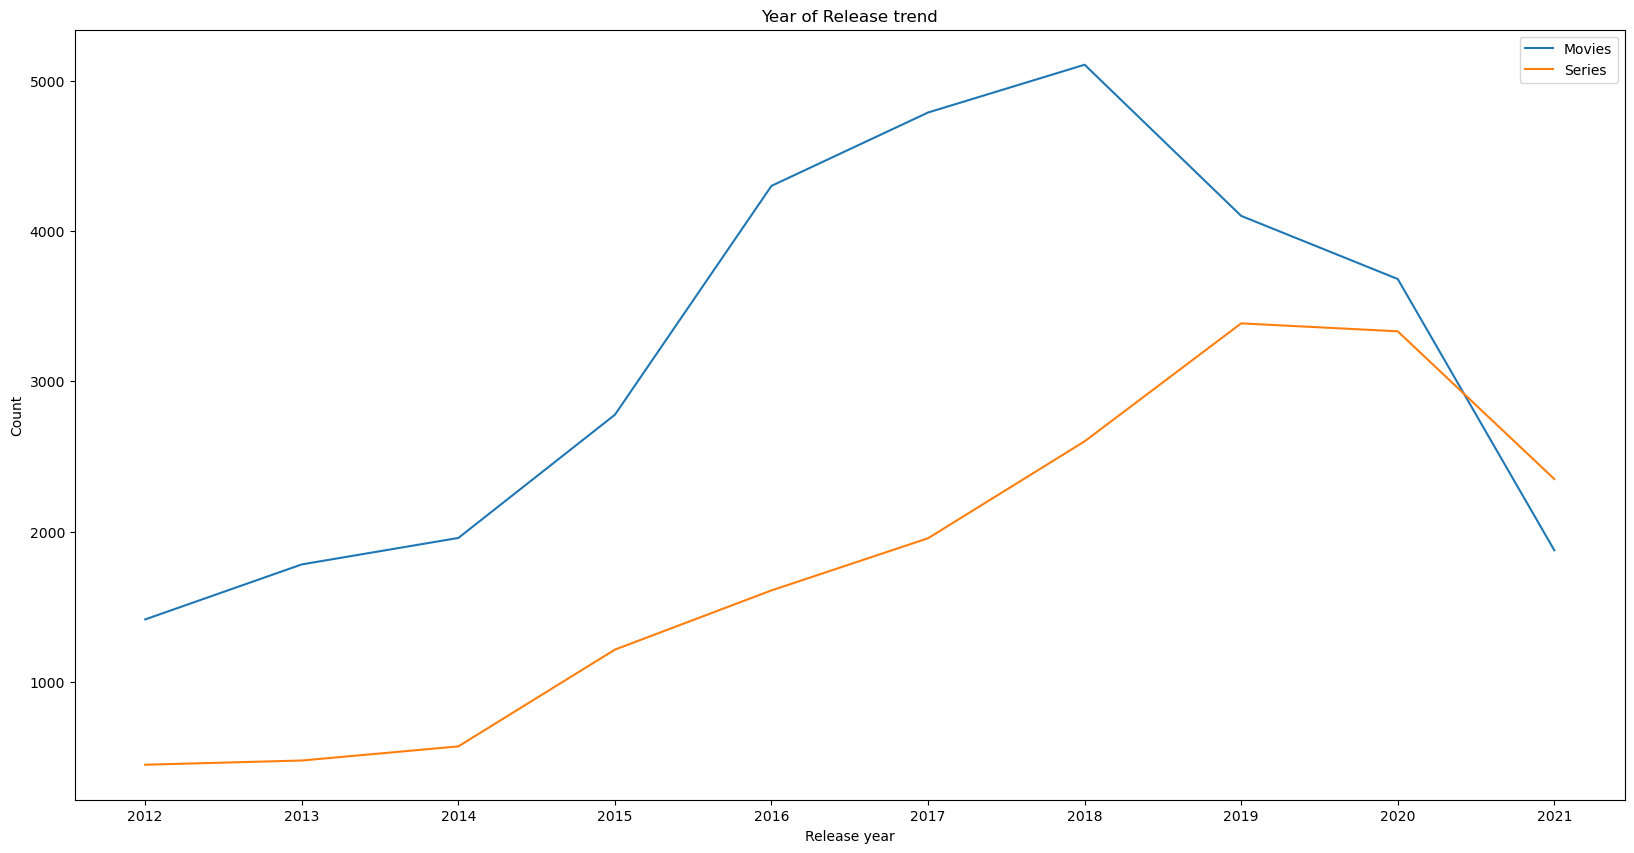

In [88]:
plt.figure(figsize=(20,10))
movies_plot = sns.lineplot(data=release_year_m,x=release_year_m["index"],y=release_year_m["release_year"],label="Movies")
series_plot = sns.lineplot(data=release_year_s,x=release_year_s['index'],y=release_year_s['release_year'],label="Series")
plt.xticks(release_year_m["index"])
plt.xlabel('Release year')
plt.ylabel('Count')
plt.title('Year of Release trend')
plt.legend()
plt.show()

**Observation** :
- There is a increase in the number of content produced from ***2014 to 2018, this might be due to the internet being easily made available for everyone***, thus with better internet and cheaper plans, users started using OTT more liberally

- ***But after 2019***, popularity takes a slump, ***this might be due to the COVID pandemic***, since the entire world was on lockdown, it would have been difficult for the movie/TV show production to happen, Hence ***hastily created content are less popular***

### 6. Popularity - Column :  duration

#### Movies

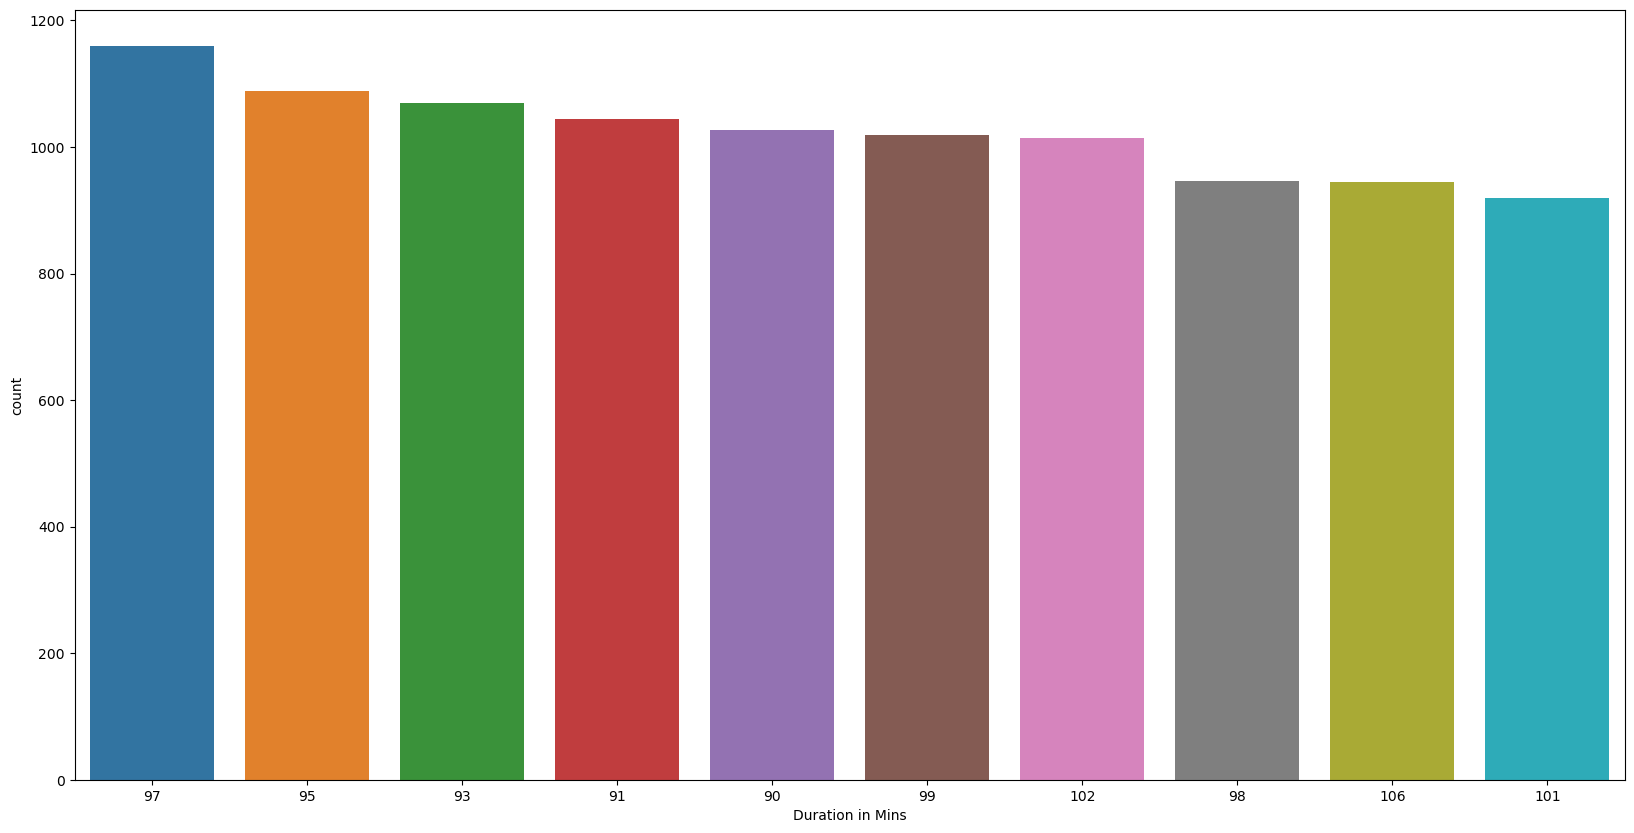

In [89]:
plt.figure(figsize=(20,10))
sns.countplot(data=movies,x=movies["duration"],order = movies['duration'].value_counts().index[1:11])
plt.xlabel('Duration in Mins')
plt.show()

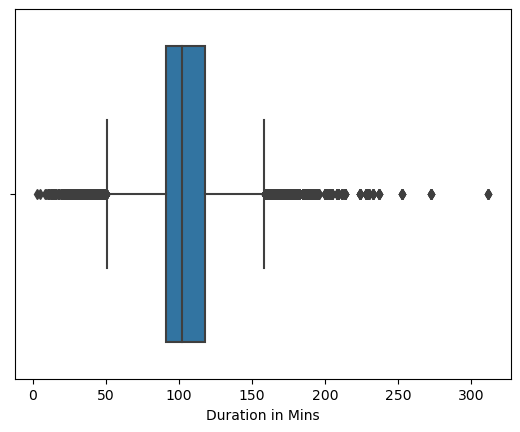

In [90]:
sns.boxplot(data=movies,x=movies["duration"])
plt.xlabel('Duration in Mins')
plt.show()

In [91]:
np.percentile(movies['duration'],q=(25,50,75))

array([ 91., 102., 118.])

**Observation** : Most of the popular movies have runtimes between ***91 mins and 118 mins***

#### TV Shows

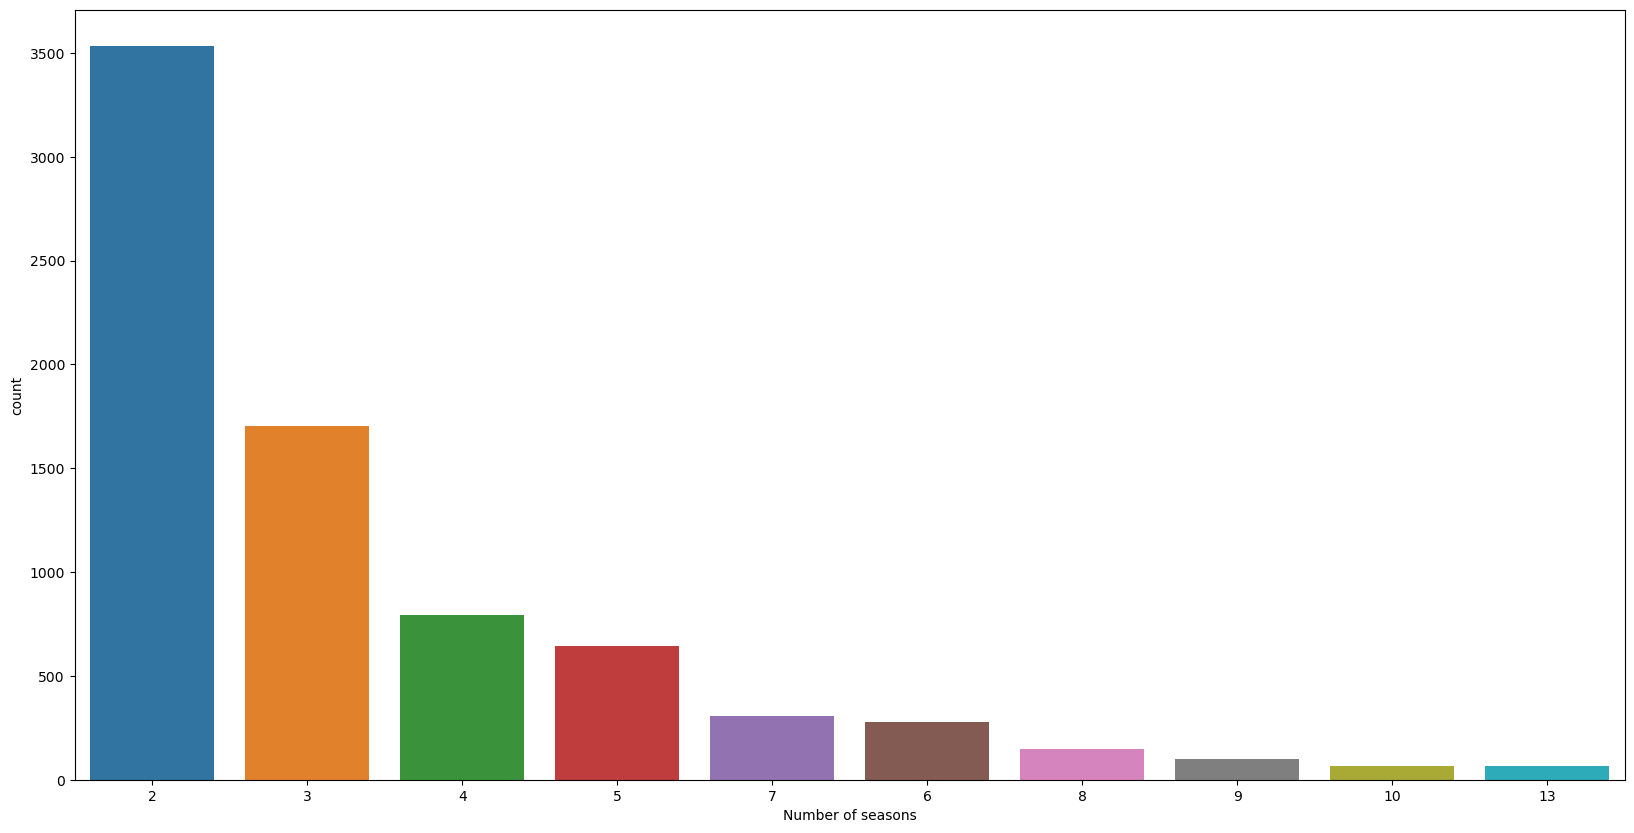

In [92]:
plt.figure(figsize=(20,10))
sns.countplot(data=series,x=series["duration"],order = series['duration'].value_counts().index[1:11])
plt.xlabel('Number of seasons')
plt.show()

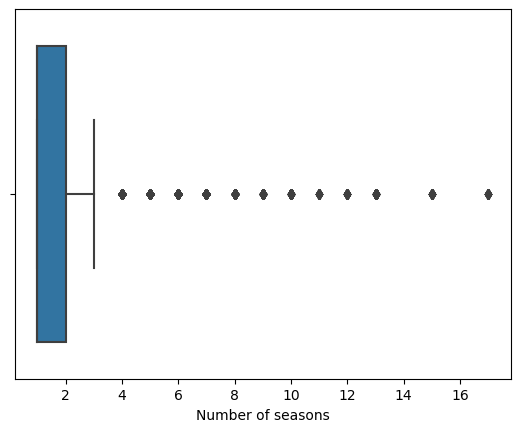

In [93]:
sns.boxplot(data=series,x=series["duration"])
plt.xlabel('Number of seasons')
plt.show()

In [94]:
np.percentile(series['duration'],q=(25,50,75))

array([1., 1., 2.])

**Observation** : Most of the popular TV Shows are limited between ***1 to 2 seasons***

## Observations and Insights :
1. ***69.62%*** of the total content are ***movies*** and ***30.38% are TV shows***, Hence ***Movies are more popular than TV shows.***


2. ***Mature audience TV shows (TV-MA) are more popular*** followed by shows for kids of age 14 and above.


3. It is observed that ***United states leads the world in both TV shows and Movies***, India stands second in the list, followed by United kingdom and Japan.
4. In ***India, it is observed that movies are more popular*** compared to TV shows.
5. In ***South Korea and Japan, TV shows are more popular*** compared to movies.


6. The ***directors*** producing the most popular shows or movies are ***Rajiv Chilaka, Jan Suter and Raul Campos***
7. ***Rajiv Chilaka's Chhota bheem*** series and movies are popular in among kids in India
8. ***Jan Suter and Raúl Campos*** make popular ***South American films.***


9.  ***Anupham Kher*** has acted in many popular movies and TV shows, followed by ***Sharukh Khan, Julie Tejwani and Naseeruddin Shah.***
10. ***Takahiro Sakurai and Yuki Kaji*** have been the cast of many popular ***TV shows***.


11. There is a ***increase*** in the number of content produced from ***2014 to 2018***, this might be due to the internet being easily made available for everyone, thus with better internet and cheaper plans, users started using OTT more liberally.
12. But ***after 2019, popularity plummets***, this might be due to the ***COVID pandemic***, since the entire world was on lockdown, it would have been difficult for the movie/TV show production to happen, Hence ***hastily created content are less popular.***


13. Most of the popular ***movies*** have runtimes between ***91 mins and 118 mins.***
14. Most of the popular ***TV Shows*** are limited between ***1 to 2 seasons.***

## Recommendations : 
1. Since, the majority of the popular content on Netflix are movies, ***it is recommended that Netflix can concentrate more on producing Movies.***


2. TV shows for mature audience (TV-MA) are more popular, it is followed by TV-14 for kids of 14 years and above, Hence ***it is recommended that netflix should produce content for Adults and Kids.***


3. Movies and TV shows from United states from United States are the most popular, ***Hence Netflix should be working more with directors/ writers from United States.***


4. Rajiv Chilaka, animator from India, known for his Chhota bheem franchise for children has the most number of popular content. He is followed by Jan Suter and Raul Campos who make South American Films. Hence it is recommended that, ***Netflix can work more on animation content for children and with South American filmakers.***


5. Films of popular Indian actors namely, Anupham Kher, Sharukh Khan, Naseeruddin Shah are popular on Netflix, Hence it can be inferred that, movies of Classic Indian actors are popular among the audience, Hence ***it is recommended that Netflix should have more Movies of well-established Indian actors***.

6. It is observed that TV shows featuring Takahiro Sakurai and Yuki Kaji are popular, Hence netflix can concentrate on working with these Japanese artists.


7. Content from 2014 to 2018 are more popular, compared to the preceeding or the succeeding years, COVID pandemic has significantly affected the Content creation post 2019. It also shows that, the content hastily produced is not popular among audience, Hence Netflix should have a better production plan.


8. It is recommended ***to limit the runtime of Movies between 91 to 118 mins.***
9. It is recommended ***to limit the number of seasons of TV shows from 1 to 2.***